This code is for presenting the gridsearchCV results and to select the hyperparameters. 

In [18]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [19]:
data_types = ['EEG', 'MOTION','EDA', 'PUPIL', 'GAZE']

In [26]:
folder = '(4-2)(v3-param)11_01_2025-03_39_PM'
clfs = {}
for dt in data_types:
    file = glob.glob(f'models/{folder}/*-{dt}-*')[0]
    print(file)
    clf = pickle.load(open(file, 'rb'))
    clfs.update({dt: clf})
clf.keys()

models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-EEG-11_01_2025-04_15_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-MOTION-11_01_2025-04_29_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-EDA-11_01_2025-05_14_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-PUPIL-11_01_2025-04_44_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-GAZE-11_01_2025-04_53_PM.pkl


dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true'])

In [27]:
for model in clfs['EEG']['estimator']:
    print(model.best_estimator_)

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x7ff7c0c04400>)),
                ('classify', SVC(C=5, degree=4, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=25,
                             score_func=<function mutual_info_classi

In [28]:
scores = dict()
for key, clf in clfs.items():
    score = pd.DataFrame(
        {
            'test_ROC': clf['test_ROC'],
            'train_ROC': clf['train_ROC'],
            'test_Accuracy': clf['test_Accuracy'],
            'train_Accuracy': clf['train_Accuracy'],
            'test_F1-macro': clf['test_F1-macro'], 
            'train_F1-macro': clf['train_F1-macro']
        }
    )
    scores.update({key: score})
scores['EEG']

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
0,0.873327,0.983236,0.531915,0.937261,0.441667,0.939115
1,0.774007,0.989581,0.386364,0.938931,0.354530,0.941539
2,0.856507,0.993842,0.583333,0.985452,0.613847,0.985560
3,0.753461,0.994020,0.409091,0.940458,0.338228,0.942943
4,0.804867,0.986362,0.404255,0.905126,0.412402,0.907637
5,0.830811,0.991252,0.434783,0.955657,0.436840,0.956974
6,0.827527,0.995818,0.500000,0.964012,0.495140,0.965786
7,0.815500,0.983646,0.458333,0.890505,0.443811,0.894066
8,0.819596,0.992502,0.479167,0.954824,0.478022,0.954626
9,0.747001,0.986074,0.312500,0.879020,0.323605,0.880167


In [29]:
midx = {}
for key, val in scores.items():
    ary = val['test_F1-macro'].values
    idx = np.where(ary == max(ary))[0]
    midx[key] = idx[0]
    print(key, max(ary), idx)
midx

EEG 0.6138474594236845 [2]
MOTION 0.7276190476190476 [16]
EDA 0.31222943722943725 [27]
PUPIL 0.7903169627307558 [11]
GAZE 0.6874458874458874 [21]


{'EEG': 2, 'MOTION': 16, 'EDA': 27, 'PUPIL': 11, 'GAZE': 21}

In [30]:
for key, clf in clfs.items():
    idx = midx[key]
    m = clf['estimator'][idx].best_estimator_
    print(key, m)

EEG Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
MOTION Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=13,
                             score_func=<function mutual_info_classif at 0x7ff7c0c04400>)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
EDA Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', LinearDiscriminantAnalysis(n_components=3)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
PUPIL Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', NeighborhoodComponentsAnalysis(n_components=3)),
                ('classify',
                 SVC(C=1, degree=2, gamma=0.001, probability=True))])
GAZE Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
    

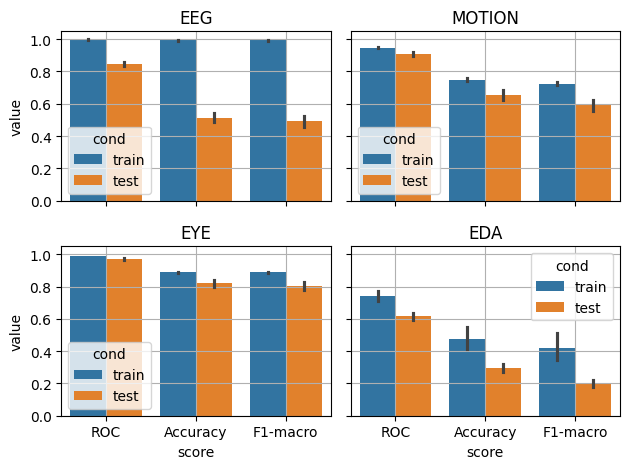

In [40]:
_, ax = plt.subplots(2,2, sharex=True, sharey=True)
r, c = 0,0
for key, score in scores.items():
    x = score.melt()
    x['score'] = [a.split('_')[1] for a in x.variable]
    x['cond'] = [a.split('_')[0] for a in x.variable]
    sns.barplot(data=x, x='score', y='value', hue='cond', ax=ax[r,c], hue_order=['train', 'test'])
    ax[r,c].grid()
    ax[r,c].set_title(key)
    c += 1
    if c == 2:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

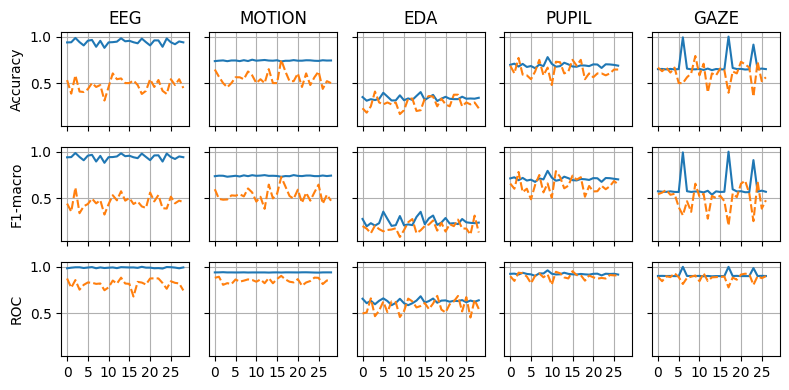

In [10]:
_, ax = plt.subplots(3, 5, figsize=(8, 4), sharex=True, sharey=True)
c = 0
for key, score in scores.items():
    ax[0, c].set_title(key)
    sns.lineplot(score[['train_Accuracy','test_Accuracy']], ax=ax[0, c])
    sns.lineplot(score[['train_F1-macro', 'test_F1-macro']], ax=ax[1, c])
    sns.lineplot(score[['train_ROC', 'test_ROC']], ax=ax[2, c])
    for i in range(3): 
        ax[i, c].legend().remove()
        ax[i, c].grid()
        ax[i, c].set_xticks(range(0, score.shape[0], 5))
    c += 1
    
ax[0, 0].set_ylabel('Accuracy')
ax[1, 0].set_ylabel('F1-macro')
ax[2, 0].set_ylabel('ROC')

plt.tight_layout()
plt.show()